# 0 Setup

In [45]:
import pandas as pd
import tqdm as tqdm
from pyflightdata import FlightData
import matplotlib.pyplot as plt

In [36]:

# Load the data
file_path = 'data/IVDA_A3_2024_Company_FlightData.csv'  # Replace with your actual file path
data = pd.read_csv(file_path, sep=';')


# 1 Reduction of missing data of departure and destination - 4 points

In [37]:
# Check for missing values
missing_values = data[['Departure', 'Destination']].isna().sum()
print(missing_values)


Departure      3204
Destination    3204
dtype: int64


In [39]:
filtered_data = data[(data['Departure'].isnull()) | (data['Destination'].isnull())]

# Print the filtered rows
print(filtered_data[["Flight number", "Departure", "Destination"]])

     Flight number Departure Destination
0         6,00E+32       NaN         NaN
1         6,00E+32       NaN         NaN
5           2L1513       NaN         NaN
20          9E5379       NaN         NaN
26          A37113       NaN         NaN
...            ...       ...         ...
7381           NaN       NaN         NaN
7394           NaN       NaN         NaN
7399           NaN       NaN         NaN
7419           NaN       NaN         NaN
7421           NaN       NaN         NaN

[3204 rows x 3 columns]


In [30]:
fd = FlightData()

flight = fd.get_history_by_flight_number('LX1266')

print(flight[-1])
print(flight[0])


print(flight[-1]["airport"]["origin"]["code"]["iata"])
print(flight[-1]["airport"]["destination"]["code"]["iata"])

{'identification': {'number': {'default': 'LX1266', 'alternative': 'None'}, 'callsign': 'SWR193T', 'codeshare': 'None'}, 'status': {'live': False, 'text': 'Landed 08:59', 'estimated': 'None', 'ambiguous': False, 'generic': {'status': {'text': 'landed', 'type': 'arrival', 'color': 'green', 'diverted': 'None'}, 'eventTime': {'utc_millis': 1728629966000, 'utc_date': '20241011', 'utc_time': '0859', 'utc': 1728629966, 'local_millis': 1728637166000, 'local_date': '20241011', 'local_time': '1059', 'local': 1728637166}}}, 'aircraft': {'model': {'code': 'BCS3', 'text': 'Airbus A220-300'}, 'registration': 'HB-JCM', 'country': {'name': 'Switzerland', 'alpha2': 'CH', 'alpha3': 'CHE'}, 'restricted': False, 'serialNo': 'None', 'age': {'availability': True}, 'availability': {'serialNo': True, 'age': True}}, 'owner': {'name': 'Swiss', 'code': {'iata': 'LX', 'icao': 'SWR'}}, 'airline': {'name': 'Swiss', 'code': {'iata': 'LX', 'icao': 'SWR'}, 'short': 'Swiss'}, 'airport': {'origin': {'name': 'Zurich Air

In [40]:

def retrieve_missing_info(row):
    if (pd.isnull(row['Departure']) or pd.isnull(row['Destination'])) and row.name in filtered_data.index:
        try:
            if len(fd.get_flights(row['Flight number'])) > 0:
                flight_info = fd.get_history_by_flight_number(row['Flight number'])  # Retrieve flight information based on past flights.
                if len(flight_info) > 0:
                    row['Departure'] = flight_info[-1]["airport"]["origin"]["code"]["iata"]  # Adjust this based on actual response structure
                    row['Destination'] = flight_info[-1]["airport"]["destination"]["code"]["iata"]  # Adjust this based on actual response structure
                    print(f"{row.name}/{len(data)}")
        except Exception as e:
            print(f"Error retrieving departure for flight {row['Flight number']}: {e}")
    return row

In [15]:
data = data.apply(retrieve_missing_info, axis=1)

38/7464
39/7464
40/7464
41/7464
43/7464
45/7464
48/7464
54/7464
HTML code 402 - Retry in 10 seconds...
59/7464
HTML code 400 - Retry in 10 seconds...
61/7464
63/7464
65/7464
69/7464
72/7464
HTML code 402 - Retry in 10 seconds...
77/7464
HTML code 400 - Retry in 10 seconds...
79/7464
84/7464
88/7464
89/7464
90/7464
91/7464
HTML code 402 - Retry in 10 seconds...
93/7464
94/7464
95/7464
HTML code 402 - Retry in 10 seconds...
98/7464
102/7464
104/7464
HTML code 402 - Retry in 10 seconds...
116/7464
119/7464
120/7464
HTML code 402 - Retry in 10 seconds...
127/7464
136/7464
144/7464
147/7464
154/7464
HTML code 402 - Retry in 10 seconds...
155/7464
156/7464
157/7464
158/7464
159/7464
HTML code 402 - Retry in 10 seconds...
160/7464
164/7464
HTML code 402 - Retry in 10 seconds...
203/7464
HTML code 402 - Retry in 10 seconds...
HTML code 402 - Retry in 10 seconds...
218/7464
231/7464
HTML code 402 - Retry in 10 seconds...
232/7464
233/7464
238/7464
240/7464
241/7464
242/7464
HTML code 402 - Retr

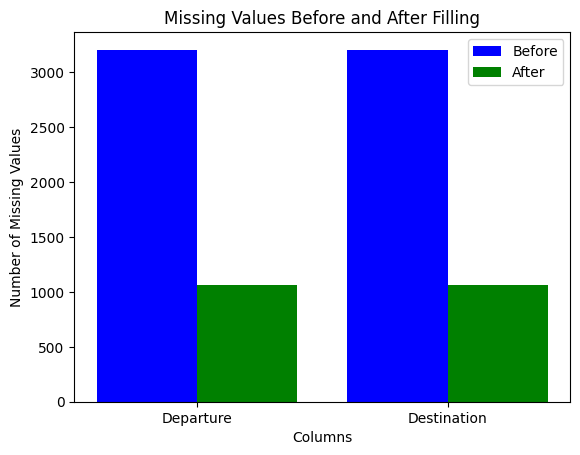

In [17]:

# Plot before filling missing values
missing_before = missing_values

# After filling missing values
missing_after = data[['Departure', 'Destination']].isnull().sum()

# Plotting
labels = ['Departure', 'Destination']
before_counts = [missing_before['Departure'], missing_before['Destination']]
after_counts = [missing_after['Departure'], missing_after['Destination']]

x = range(len(labels))

plt.bar(x, before_counts, width=0.4, label='Before', color='blue', align='center')
plt.bar([p + 0.4 for p in x], after_counts, width=0.4, label='After', color='green', align='center')

plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values Before and After Filling')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()
plt.show()


Before: 3204
After: 1058

In [32]:
# Save progress to file.
data.to_csv('data/t1_IVDA_A3_2024_Company_FlightData.csv', index=False, sep=';')

# 2 Airport code errors - 1 point

In [41]:
# Load airport data
file_path = 'data/iata-icao.csv'  # Replace with your CSV file path
airport_data = pd.read_csv(file_path)

## 2.1 Find airport code errors

In [114]:
# Load your main DataFrame (replace with your actual DataFrame)
main_data_file_path = 'data/t1_IVDA_A3_2024_Company_FlightData.csv'  # Replace with your CSV file path
main_data = pd.read_csv(main_data_file_path, sep=';')

# Convert the valid IATA codes to a set for quick lookup
valid_iata_set = set(airport_data['iata'].str.upper())  # Convert to uppercase for consistency

# Add "IATA-Error" column for tracking
main_data["IATA-Error"] = 0

# Function to check and correct IATA codes
def check_airport_codes(row):
    if row['Departure'] not in valid_iata_set:
        row['Departure'] = None
        row["IATA-Error"] = 1
    if row['Destination'] not in valid_iata_set:
        row['Destination'] = None
        row["IATA-Error"] = 1
    return row


In [118]:
tmp_error_data_before = main_data.apply(check_airport_codes, axis=1)


## 2.2 Resolving IATA-Errors

In [129]:
def solve_iata_error(row):
    if row['IATA-Error'] == 1:
        try:
            if len(fd.get_flights(row['Flight number'])) > 0:
                flight_info = fd.get_history_by_flight_number(row['Flight number'])  # Retrieve flight information based on past flights.
                if len(flight_info) > 0:
                    row['Departure'] = flight_info[-1]["airport"]["origin"]["code"]["iata"]  # Adjust this based on actual response structure
                    row['Destination'] = flight_info[-1]["airport"]["destination"]["code"]["iata"]  # Adjust this based on actual response structure
                    row['IATA-Error'] = 0
                    print(f"{row.name}/{len(data)}")
        except Exception as e:
            print(f"Error retrieving departure for flight {row['Flight number']}: {e}")
    return row

In [130]:
tmp_error_data_after = tmp_error_data_before.apply(solve_iata_error, axis=1)

132/7464
135/7464
139/7464
1017/7464
1020/7464
1243/7464
1244/7464
1347/7464
HTML code 402 - Retry in 10 seconds...
1348/7464
1349/7464
1774/7464
1775/7464
HTML code 402 - Retry in 10 seconds...
3298/7464
3302/7464
5602/7464
5607/7464
5608/7464
5609/7464
5617/7464
5618/7464
HTML code 402 - Retry in 10 seconds...
5619/7464
5620/7464
5793/7464
5892/7464
5893/7464
HTML code 402 - Retry in 10 seconds...
6081/7464
6170/7464
6172/7464
6173/7464
HTML code 402 - Retry in 10 seconds...
6174/7464
6567/7464
6928/7464
6929/7464
6930/7464
6946/7464


In [131]:
missing_before = (tmp_error_data_before['IATA-Error'] == 1).sum()

missing_after = (tmp_error_data_after['IATA-Error'] == 1).sum()

print(missing_before)
print(missing_after)

75
40


## 2.3 Plotting airport error development

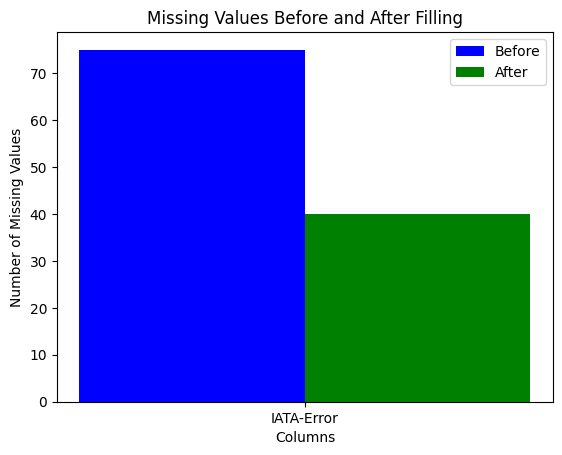

In [132]:
# Plot before filling missing values
missing_before = (tmp_error_data_before['IATA-Error'] == 1).sum()

# After filling missing values
missing_after = (tmp_error_data_after['IATA-Error'] == 1).sum()

# Plotting
labels = ['IATA-Error']
before_counts = [missing_before]
after_counts = [missing_after]

x = range(len(labels))

plt.bar(x, before_counts, width=0.4, label='Before', color='blue', align='center')
plt.bar([p + 0.4 for p in x], after_counts, width=0.4, label='After', color='green', align='center')

plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values Before and After Filling')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()
plt.show()

In [133]:
# Save the updated DataFrame if needed
main_data.to_csv('data/t2_IVDA_A3_2024_Company_FlightData.csv', index=False)  # Replace with your desired output path

# 3 Derive latitude and longitude- 1 point

In [195]:
# Load your main DataFrame (replace with your actual DataFrame)
main_data_file_path = 'data/t2_IVDA_A3_2024_Company_FlightData.csv'  # Replace with your CSV file path
main_data = pd.read_csv(main_data_file_path)

# Load airport data
file_path = 'data/iata-icao.csv'  # Replace with your CSV file path
airport_data = pd.read_csv(file_path)

# Initialize new columns with None
main_data['dep_lat'] = None
main_data['dep_lon'] = None
main_data['dest_lat'] = None
main_data['dest_lon'] = None

In [197]:
def get_lat_long_by_iata(iata_code, df):
    """Retrieve latitude and longitude for a given IATA code."""
    # Filter the DataFrame for the given IATA code
    airport_info = df[df['iata'].str.upper() == iata_code.upper()]

    if not airport_info.empty:
        # Extract latitude and longitude
        latitude = airport_info['latitude'].values[0]
        longitude = airport_info['longitude'].values[0]
        return latitude, longitude
    else:
        return None, None  # Return None if IATA code is not found

In [198]:

# Iterate through the main DataFrame and fill the new columns
for index, row in main_data.iterrows():
    if pd.isna(row['Departure']) or pd.isna(row['Destination']):
        pass
    else:
        dep_iata = row['Departure']
        dest_iata = row['Destination']
        
        # Get latitude and longitude for the departure IATA code
        dep_lat, dep_long = get_lat_long_by_iata(dep_iata, airport_data)
        main_data.at[index, 'dep_lat'] = dep_lat
        main_data.at[index, 'dep_lon'] = dep_long
        
        # Get latitude and longitude for the destination IATA code
        dest_lat, dest_long = get_lat_long_by_iata(dest_iata, airport_data)
        main_data.at[index, 'dest_lat'] = dest_lat
        main_data.at[index, 'dest_lon'] = dest_long



In [199]:
missing_values = main_data[['dep_lat', 'dep_lon', 'dest_lat', 'dest_lon']].isna().sum()
print(missing_values)

print(main_data["Total Distance [km]"])

dep_lat     1100
dep_lon     1100
dest_lat    1091
dest_lon    1091
dtype: int64
0        913.0
1        913.0
2        504.0
3        504.0
4       1082.0
         ...  
7459    1336.0
7460    5599.0
7461    1336.0
7462     816.0
7463    1737.0
Name: Total Distance [km], Length: 7464, dtype: object


In [200]:
# Save the updated DataFrame
main_data.to_csv('data/t3_IVDA_A3_2024_Company_FlightData.csv', index=False) 

# 4 Total distance outlier detection- 3 points

In [220]:
# Setup
main_data = pd.read_csv('data/t3_IVDA_A3_2024_Company_FlightData.csv')

In [253]:
from geopy.distance import geodesic

main_data["Air Distance"] = 0      

def calc_air_dist(row):
    if pd.isna(row['dep_lat']) or pd.isna(row['dep_lon']):
        row["Air Distance"] = None
    else:
        dep = (row["dep_lat"], row["dep_lon"])
        dest = (row["dest_lat"], row["dest_lon"])
        try:
            row["Air Distance"] = round(geodesic(dep, dest).km)
        except:
            row["Air Distance"] = None
    return row


In [254]:
tmp_dist_data_before = main_data.apply(calc_air_dist, axis=1)

In [255]:
missing_before = (tmp_dist_data_before['Air Distance'] == 0).sum()

print(missing_before)

7


In [256]:
print(tmp_dist_data_before.iloc[5000])

Flight number                                              LX8
Aircraft type                                              NaN
Departure                                                  ZRH
Destination                                                ORD
Segments                                                   1.0
Service class                                                Y
Total Distance [km]                                     7253.0
CO2 RFI 2 + emissions jet fuel production 15.2% [t]        NaN
Department                                               Sales
IATA-Error                                                   0
dep_lat                                                47.4647
dep_lon                                                8.54917
dest_lat                                               41.9786
dest_lon                                              -87.9047
Air Distance                                            7150.0
Name: 5000, dtype: object


## 4.1 Visualization of distribution

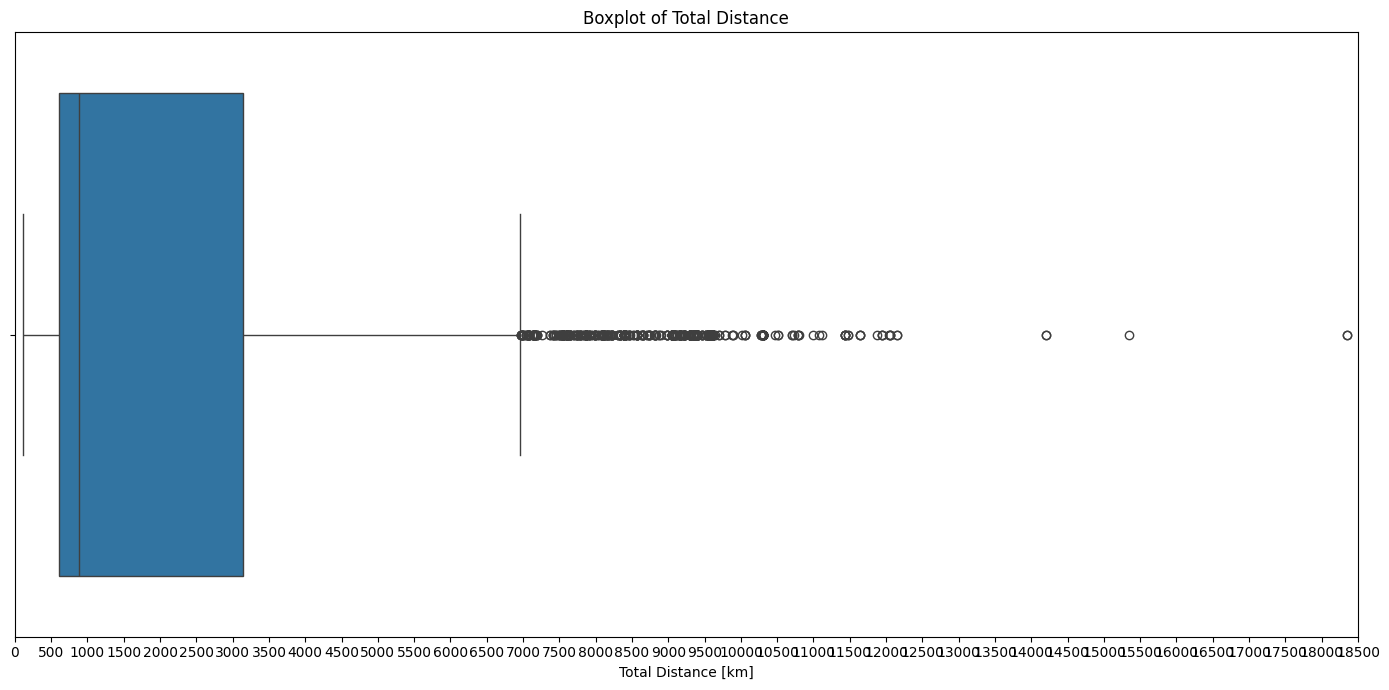

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Filter out values that are 0 or None (NaN)
tmp_dist_data_before_plot = tmp_dist_data_before[(tmp_dist_data_before['Air Distance'] > 0)]


# Visualize the distribution of Total Distance with improvements
plt.figure(figsize=(14, 7))  # Increase the figure size
sns.boxplot(x='Air Distance', data=tmp_dist_data_before_plot)  # Horizontal boxplot
plt.title('Boxplot of Total Distance')
plt.xlabel('Total Distance [km]')

# Calculate the min and max for the x-axis limits
min_distance = tmp_dist_data_before_plot['Air Distance'].min()
max_distance = tmp_dist_data_before_plot['Air Distance'].max()

# Set x-axis limits based on the data range
plt.xlim(min_distance - (min_distance % 500), max_distance + (500 - (max_distance % 500)))

# Set x-ticks to show whole numbers at 500 km intervals for better readability
tick_positions = np.arange(min_distance // 500 * 500, max_distance // 500 * 500 + 1000, 500)
plt.xticks(tick_positions)

# Ensure that the ticks are in ascending order
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500))  # Set major ticks at 500 km intervals

# Show the plot
plt.tight_layout()  # Adjust layout to make it look better
plt.show()


In [251]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = tmp_dist_data_before_plot['Air Distance'].quantile(0.25)
Q3 = tmp_dist_data_before_plot['Air Distance'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Identify outliers
outliers = tmp_dist_data_before_plot[(tmp_dist_data_before_plot['Air Distance'] < lower_bound) | 
                     (tmp_dist_data_before_plot['Air Distance'] > upper_bound)]

print(f"Number of outliers detected: {len(outliers)}")


Lower Bound: -3208.375, Upper Bound: 6960.625
Number of outliers detected: 725
